In [1]:
import faiss
import numpy as np


In [2]:
import faiss
import numpy as np
 
string_to_vector = {
    "apple": [1.0, 2.0, 3.0],
    "banana": [4.0, 5.0, 6.0],
    "grape": [7.0, 8.0, 3.0]
}
 
d = 3   
index = faiss.IndexFlatL2(d) # d -> dimension of the vectors 
# Create an index for L2 distance for flat vectors which means it is string-to-vector mapping 
 
vectors = np.array(list(string_to_vector.values()), dtype='float32')
index.add(vectors)
 
query_vector = np.array([[3.0, 3.0, 3.0]], dtype='float32')   

k = 1

distances, indices = index.search(query_vector, k) 
vector_to_string = {i: word for i, word in enumerate(string_to_vector.keys())}

print("Nearest neighbor strings:", [vector_to_string[idx] for idx in indices[0]])
print("Distances:", distances[0])


Nearest neighbor strings: ['apple']
Distances: [5.]


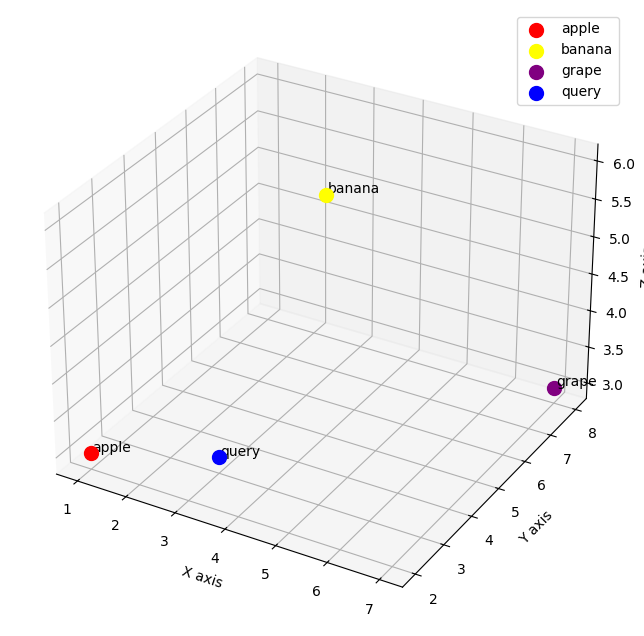

In [4]:
import matplotlib.pyplot as plt 
 
iteration = list(string_to_vector.values()) + [query_vector[0]]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

labels = ["apple", "banana", "grape", "query"]
colors = ['red', 'yellow', 'purple', 'blue']

for idx, vector in enumerate(iteration):
    ax.scatter(vector[0], vector[1], vector[2],
              label=labels[idx],
              color=colors[idx],
              s=100) 
    offset = 0.02
    ax.text(vector[0] + offset, vector[1] + offset, vector[2] + offset,
           labels[idx],
           fontsize=10)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend() 
plt.show()

In [ ]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
 
model = SentenceTransformer("all-MiniLM-L6-v2", cache_folder="cache")   
sentences = [
    "I love eating apples",
    "Bananas are yellow",
    "The sky is blue",
    "Apples are delicious fruits",
    "Mountains are beautiful"
]

sentence_vectors = model.encode(sentences)   
d = sentence_vectors.shape[1]   
nlist = 2  
quantizer = faiss.IndexFlatL2(d)   
index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2) 
index.train(sentence_vectors)
print("Index trained?", index.is_trained) 
index.add(sentence_vectors)
print("Total sentences in index:", index.ntotal)   
query = model.encode(["I like eating fruits"])   
index.nprobe = 2  
distances, indices = index.search(query, k=1)   
closest_sentence = sentences[indices[0][0]]
print("Closest sentence match:", closest_sentence)


c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange



Index trained? True
Total sentences in index: 5
Closest sentence match: I love eating apples


c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
